# PROJECT

### Name : Ramanand k

# Business Case: Netflix - Data Exploration and Visualisation
## Business Problem
#### Analyze the data and generate insights that could help Netflix team deciding which type of shows/movies to produce and how they can grow the business in different countries


# Problem Statement

- Which type of show is mostly present in Netflix
- Which director is most number of movie directed
- Most no of shows released year
- Most no of movies released year
- Most no of TV shows released year
- Which country has the most no of movies present
- Which country has the most no of TV shows present
- Which decades movie present the most
- What kind of genre added the most
- Any relation between incresing the season of Tv shows and no of tv shows present
- What length of movies mostly added
- Which country has the most no of movies present
- Which country has the most no of director in NETFLIX
- Most recent directors in USA
- Most recent directors in India
- Which age category is director mostly prefer
- Which age category has the maximum no of movies
- Which age category has the maximum no of TV shows
- Which country has the most no of actors
- What type of shows prefered most of the countries
- What type of shows mostly released in india
- What type of shows mostly released in USA
- which actor has present in the most no of movies
- Which month produced most no of films
- which month in india released most no of films


# Risks

- Dataset consist of nested columns like director,cast,listed_in
- Columns like director,cast,country,date added,release year,rating,duration consist of null values
- rating column consist of unclear data
- date added column is not in date and time format
- Most of the values are in categorical form

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df=pd.read_csv("netflix_titles.csv")
#First five values of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#last five values of dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
#shape of the data
df.shape
#data consist of 8807 rows and 12 columns

(8807, 12)

In [5]:
#Basic informations of data
df.info()
#dataset contains 12 column
#11 columns are object type and one is integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df["date_added"]=pd.to_datetime(df["date_added"])
#date and time column not in date and format so convert the column to date and time format

In [7]:
#null value containing columns
df.isna().any() 
#there are six column consist of null values include director,cast,country,date added,rating,duration

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [8]:
#null value containing rows
df.isna().all() 
#no rows consist of all null values

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [9]:
#Basic description of the numerical value of the dataset 
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
#Basic description of categorical values
df.describe(include=object)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


In [11]:
#Total duplicate values of the dataset
df.duplicated().sum() 
#dataset consist of zero duplicate values

0

In [12]:
#assigning data consist of movies in to a variable
movie_data=df[df['type']=="Movie"]
movie_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
#assigning data consist of TV show in to a variable
tv_shows=df.loc[df.type=="TV Show"]
tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


<AxesSubplot:xlabel='type', ylabel='count'>

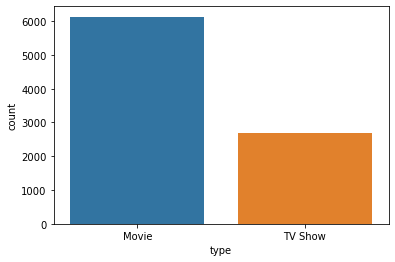

In [14]:
#countplot of column "type"
sns.countplot(data=df,x="type")

countplot shows no of movies in NETFLIX is larger than no of TV shows

([<matplotlib.patches.Wedge at 0x20602db5190>,
 [Text(-0.6935511949239879, 0.9792786835316639, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')])

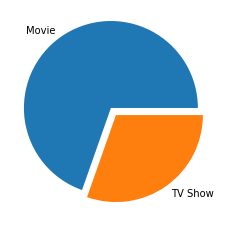

In [15]:
#pieplot of column "type"
label="Movie","TV Show"
size=df.type.value_counts()
plt.pie(size,labels=label,explode=(0.1,0))


pieplot shows no of movies in NETFLIX is larger than no of TV shows

In [16]:
#column of "director" consist of nested values so unnesting "director" column is necessary
#this unnested dataset assigned to a variable drct

drct=df.assign(director=df["director"].str.split(",")).explode("director")
drct["director"]=drct["director"].str.lstrip()

drct["director"].dropna(inplace=True)
drct.head()

#drct consist of dataset with unnested column of "director" 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# No of movies in Country

In [17]:
movies_country=movie_data.assign(country=movie_data["country"].str.split(",")).explode("country")
movies_country["country"]=movies_country["country"].str.lstrip()
movies_country.replace([""],np.nan,inplace=True)
movies_country["country"].dropna(inplace=True)

movies_in_countries=movies_country.groupby("country")["title"].count().to_frame().reset_index()
movies_in_countries=movies_in_countries.sort_values("title",ascending=False)
movies_in_countries.head(10)

,country,title
110,United States,2752
41,India,962
109,United Kingdom,534
18,Canada,319
32,France,303
34,Germany,182
97,Spain,171
49,Japan,119
21,China,114
63,Mexico,111


##### Most no of movies released in USA followed by India and UK

# No of TV Shows in country

In [18]:
tvshows_country=tv_shows.assign(country=tv_shows["country"].str.split(",")).explode("country")
tvshows_country["country"]=tvshows_country["country"].str.lstrip()
tvshows_country.replace([""],np.nan,inplace=True)
tvshows_country["country"].dropna(inplace=True)

tvshows_in_countries=tvshows_country.groupby("country")["title"].count().to_frame().reset_index()
tvshows_in_countries=tvshows_in_countries.sort_values("title",ascending=False)
tvshows_in_countries.head(10)

,country,title
62,United States,938
61,United Kingdom,272
29,Japan,199
51,South Korea,170
7,Canada,126
18,France,90
24,India,84
56,Taiwan,70
1,Australia,66
52,Spain,61


##### USA has the most no of TV shows present followed by UK and Japan

# Directors Directed Most No Of Shows

In [19]:
most_movie_directed=drct.director.value_counts().reset_index()
most_movie_directed.head(20)


,index,director
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Youssef Chahine,12
9,Martin Scorsese,12


These are the top 20 directors directed most no of shows in NETFLIX

# Directors directed most no of TV shows

In [79]:
tv_drct=drct.loc[drct.type=="TV Show"]
tv_drct1=tv_drct.groupby("director")["title"].count().to_frame().reset_index()
tv_drct1.sort_values("title",ascending=False)

,director,title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
140,Jung-ah Im,2
128,Joe Berlinger,2
...,...,...
98,Hong Won-ki,1
97,Hiroyuki Seshita,1
96,Hikaru Toda,1
95,Hernán Guerschuny,1


##### Ken Burns and Alstair Fothergill are directed most no of TV shows

# Countplot of Top 20 directors

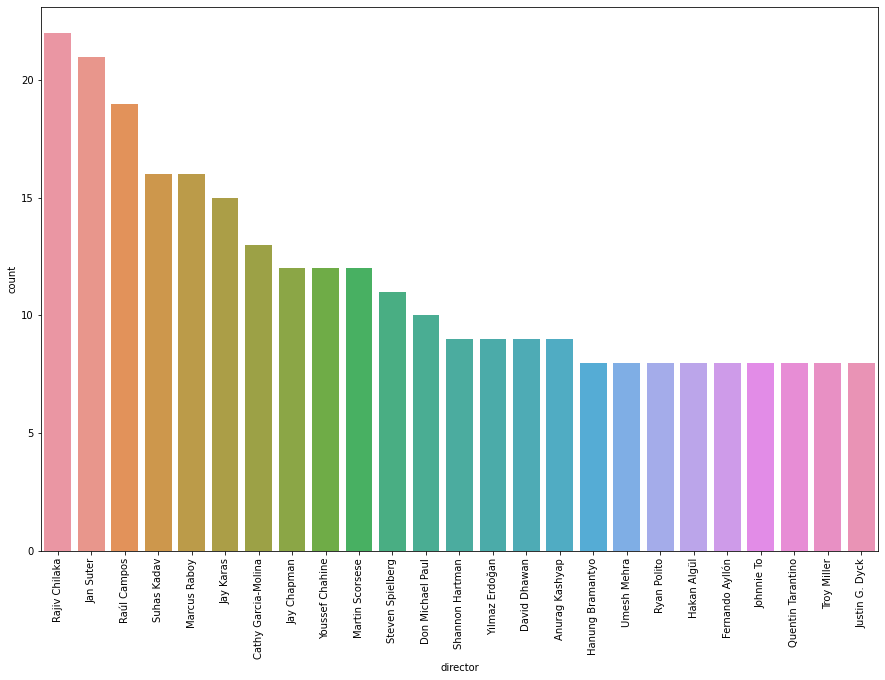

In [20]:
plt.figure(figsize=(15,10))
a=sns.countplot(data=drct,x="director",order=drct["director"].value_counts().index[0:25])
a.set_xticklabels(a.get_xticklabels(),rotation=90)
plt.show()

# Top 35 director

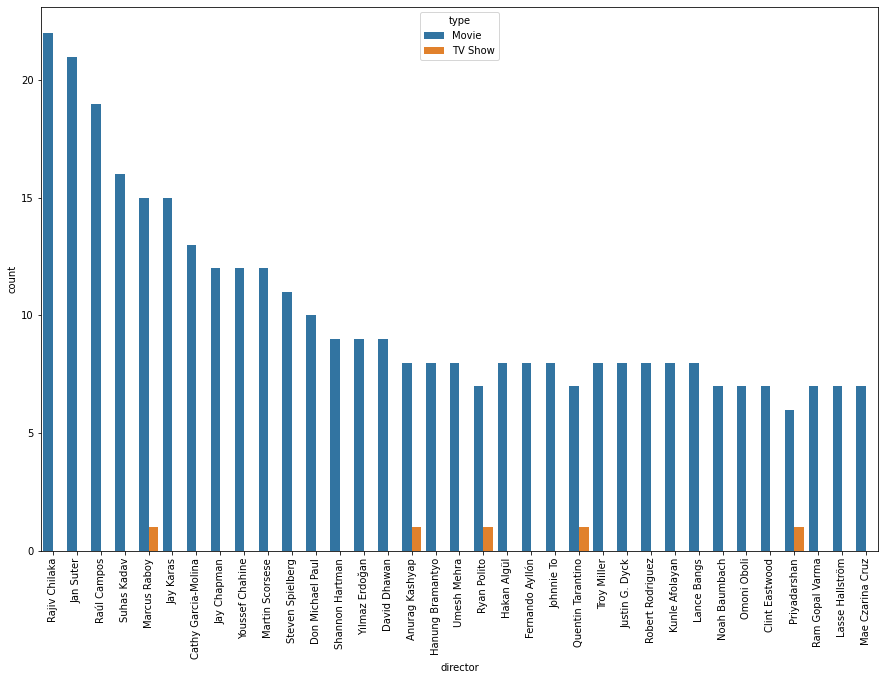

In [21]:
plt.figure(figsize=(15,10))
a=sns.countplot(data=drct,x="director",order=drct["director"].value_counts().index[0:35],hue="type")
a.set_xticklabels(a.get_xticklabels(),rotation=90)
plt.show()

From this graph we can understand that some directors directed both movies and TV Shows.
Numbers of TV Shows directed is lesser compared to movies.
Rajiv chilaka directed most no of shows followed by Jan Sutter

# Most no of Movies+TV Shows released-Top 15 years

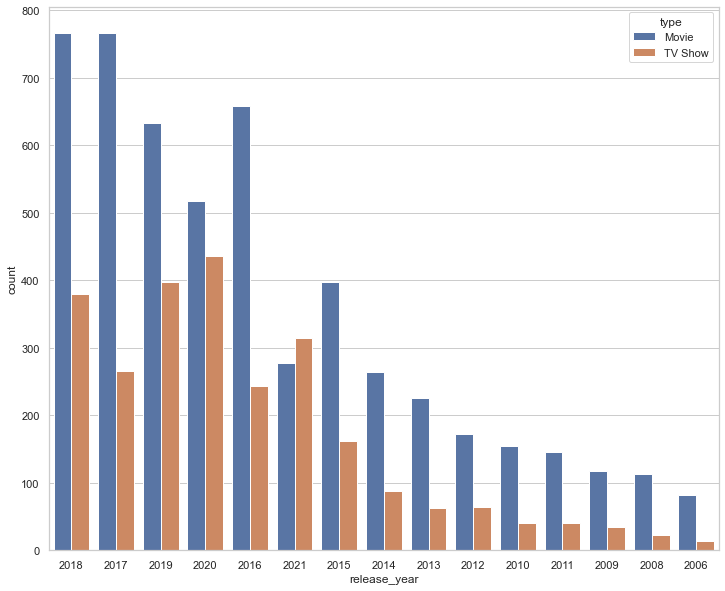

In [22]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
a = sns.countplot(x="release_year", data=df, order=df['release_year'].value_counts().index[0:15],hue="type")

2018 is the year most no of movies+TV shows released followed by 2017 and 2019

# Most no of Movies released year

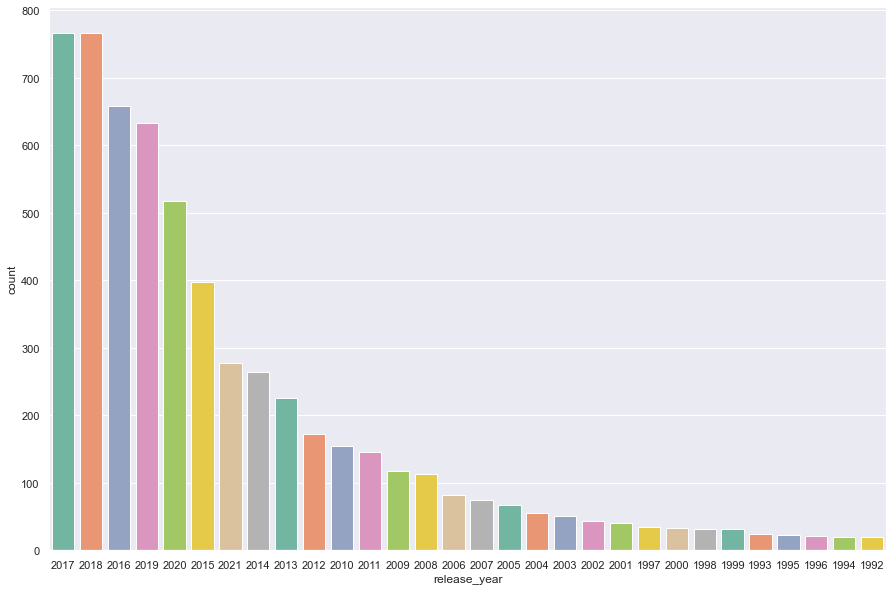

In [23]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
a = sns.countplot(x="release_year", data=movie_data, palette="Set2", order=movie_data['release_year'].value_counts().index[0:30])

2017 and 2018 is the year most no of movies released

# Most no of TV Shows released year

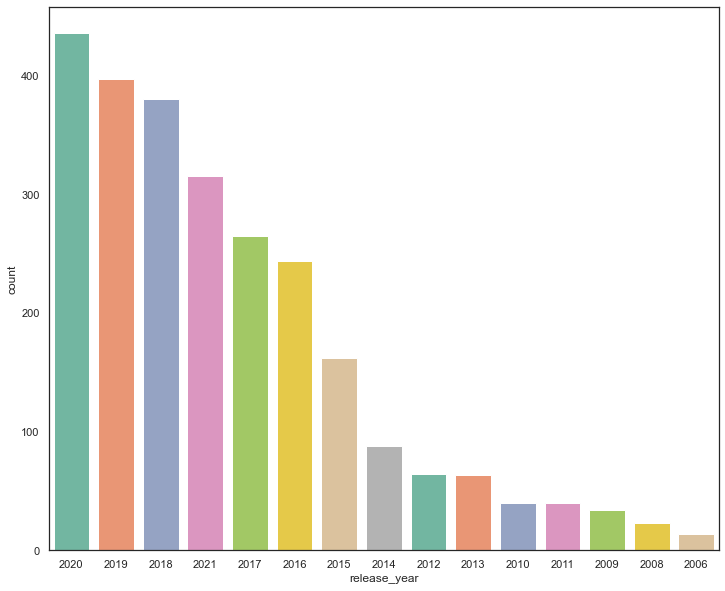

In [24]:
plt.figure(figsize=(12,10))
sns.set(style="white")
a = sns.countplot(x="release_year", data=tv_shows, palette="Set2", order=tv_shows['release_year'].value_counts().index[0:15])

- Top 15 year of most no of tv shows released
- Most no of TV Shows released in the year is 2020

In [25]:
x=df.groupby("release_year")["title"].count().to_frame().reset_index()
x.sort_values("release_year",ascending=False)

,release_year,title
73,2021,592
72,2020,953
71,2019,1030
70,2018,1147
69,2017,1032
...,...,...
4,1945,4
3,1944,3
2,1943,3
1,1942,2


# Which decade shows added the most

In [26]:
year1=x.loc[(x.release_year>1920)&(x.release_year<1930)]
a1=year1.title.sum()
print("total no of movies between 1920 and 1930 is", a1)

total no of movies between 1920 and 1930 is 1


- There is only one movie of release date between 1920-1930 in NETFLIX

In [27]:
year2=x.loc[(x.release_year>1930)&(x.release_year<1940)]
a2=year2.title.sum()
print("total no of movies between 1930 and 1940 is", a2)

total no of movies between 1930 and 1940 is 0


- There is no movie of release date between 1930-1940 in NETFLIX

In [28]:
year3=x.loc[(x.release_year>1940)&(x.release_year<1950)]
a3=year3.title.sum()
print("total no of movies between 1940 and 1950 is", a3)

total no of movies between 1940 and 1950 is 15


- There are 15 movies of release date between 1940-1950 in NETFLIX

In [29]:
year4=x.loc[(x.release_year>1950)&(x.release_year<1960)]
a4=year4.title.sum()
print("total no of movies between 1950 and 1960 is", a4)

total no of movies between 1950 and 1960 is 11


- There are 11 movies of release date between 1950-1960 in NETFLIX

In [30]:
year5=x.loc[(x.release_year>1960)&(x.release_year<1970)]
a5=year5.title.sum()
print("total no of movies between 1960 and 1970 is",a5)

total no of movies between 1960 and 1970 is 21


 - There are 21 movies of release date between 1960-1970 in NETFLIX

In [31]:
year6=x.loc[(x.release_year>1970)&(x.release_year<1980)]
a6=year6.title.sum()
print("total no of movies between 1970 and 1980 is", a6)

total no of movies between 1970 and 1980 is 68


- There are 68 movies of release date between 1970-1980 in NETFLIX

In [32]:
year7=x.loc[(x.release_year>1980)&(x.release_year<1990)]
a7=year7.title.sum()
print("total no of movies between 1980 and 1990 is", a7)

total no of movies between 1980 and 1990 is 118


 - There are 118 movies of release date between 1980-1990 in NETFLIX

In [33]:
year8=x.loc[(x.release_year>1990)&(x.release_year<2000)]
a8=year8.title.sum()
print("total no of movies between 1990 and 2000 is", a8)

total no of movies between 1990 and 2000 is 252


- There are 252 movies of release date between 1990-2000 in NETFLIX

In [34]:
year9=x.loc[(x.release_year>2000)&(x.release_year<2010)]
a9=year9.title.sum()
print("total no of movies between 2000 and 2010 is", a9)

total no of movies between 2000 and 2010 is 773


- There are 773 movies of release date between 2000-2010 in NETFLIX

In [35]:
year10=x.loc[(x.release_year>2010)&(x.release_year<2021)]
a10=year10.title.sum()
print("total no of movies between 2010 and 2020 is", a10)

total no of movies between 2010 and 2020 is 6686


- There are 6686 movies of release date between 2010-2020 in NETFLIX

In [36]:
#Created a DataFrame by taking dacades representing 10 years and no of movies released that decades

d={"no of movies":[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],"Decades":[1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]}
d1=pd.DataFrame(d)
d1


,no of movies,Decades
0,1,1930
1,0,1940
2,15,1950
3,11,1960
4,21,1970
5,68,1980
6,118,1990
7,252,2000
8,773,2010
9,6686,2020


<AxesSubplot:>

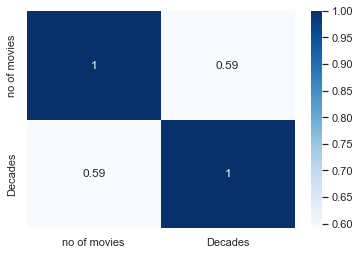

In [37]:
sns.heatmap(d1.corr(),cmap="Blues",annot=True)

- Heatmap shows the correlation between the no fo movies released with respect to 10 year
- Here the correlation is 0.59  that is positive implements no of movies included in NETFLIX is increased with respect to year

# What Kind Of Genre Mostly Added

##### Here the column listed_in nested so unnesting the column is necessary

In [38]:
dlst=df.assign(listed_in=df["listed_in"].str.split(",")).explode("listed_in")
dlst["listed_in"]=dlst["listed_in"].str.lstrip()
dlst.replace([""],np.nan,inplace=True)
dlst["listed_in"].dropna(inplace=True)
dlst

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [39]:
show_catogories=dlst.listed_in.value_counts().reset_index()
show_catogories.head(5)

,index,listed_in
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


In [40]:
show_catogories.tail(5)

,index,listed_in
37,TV Thrillers,57
38,Movies,57
39,Stand-Up Comedy & Talk Shows,56
40,Classic & Cult TV,28
41,TV Shows,16


### Countplot of Genres in NETFLIX 

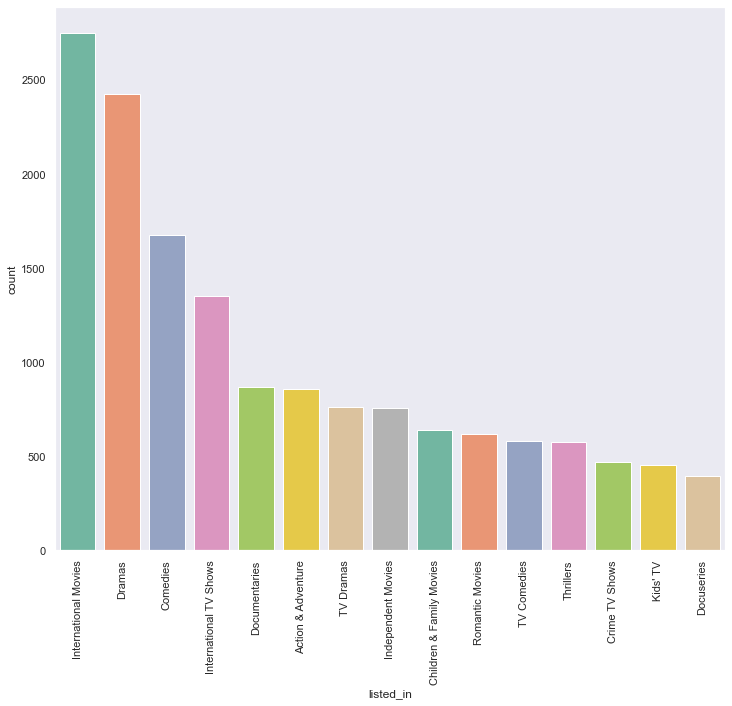

In [41]:
plt.figure(figsize=(12,10))
sns.set(style="dark")
a = sns.countplot(x="listed_in", data=dlst, palette="Set2", order=dlst['listed_in'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.show()

##### International movies is Mostly used genre in Netflix followed by Dramas and Comedies
##### 2752 shows included in International movies
##### TV shows is least used genre

# TV Show Duration

In [42]:
tvshow_duration=tv_shows.duration.value_counts().to_frame()
tvshow_duration

,duration
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9
10 Seasons,7


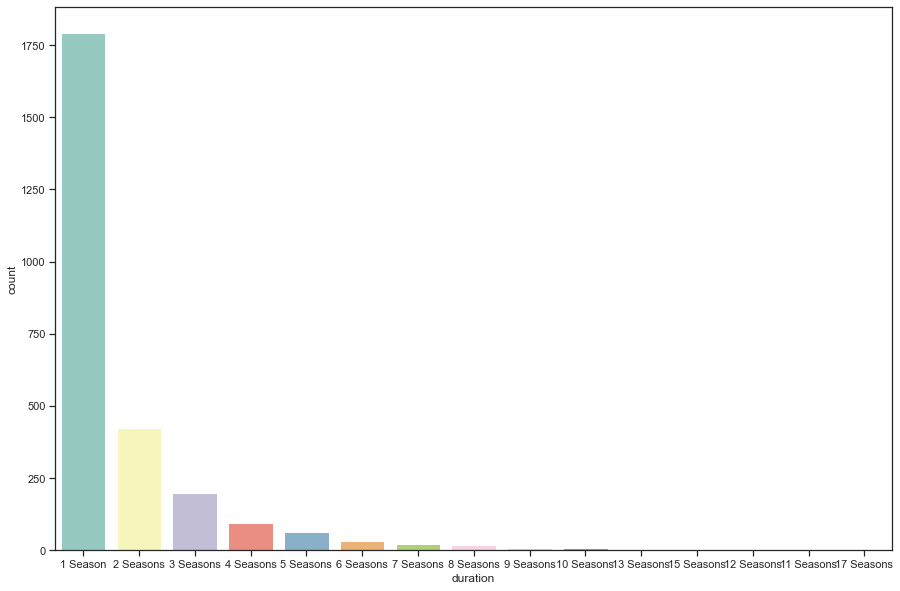

In [43]:
plt.figure(figsize=(15,10))
sns.set(style="ticks")
a = sns.countplot(x="duration", data=tv_shows, palette="Set3", order=tv_shows['duration'].value_counts().index[0:15])

##### Most TV shows ended in 1 season
##### There are 1793 TV shows ended in season 1
##### Increasing the seasons decreasing the no of shows
##### 17 season is longest season
##### Lesser no of shows in containing long seasons

# Length of Movies

In [78]:
movie_duration=movie_data.duration.value_counts().to_frame().reset_index()
movie_duration.columns=["total_time","no of movies"]
movie_duration.head(10)

,total_time,no of movies
0,90 min,152
1,94 min,146
2,93 min,146
3,97 min,146
4,91 min,144
5,95 min,137
6,96 min,130
7,92 min,129
8,102 min,122
9,98 min,120


##### Countplot of Movie Duration 

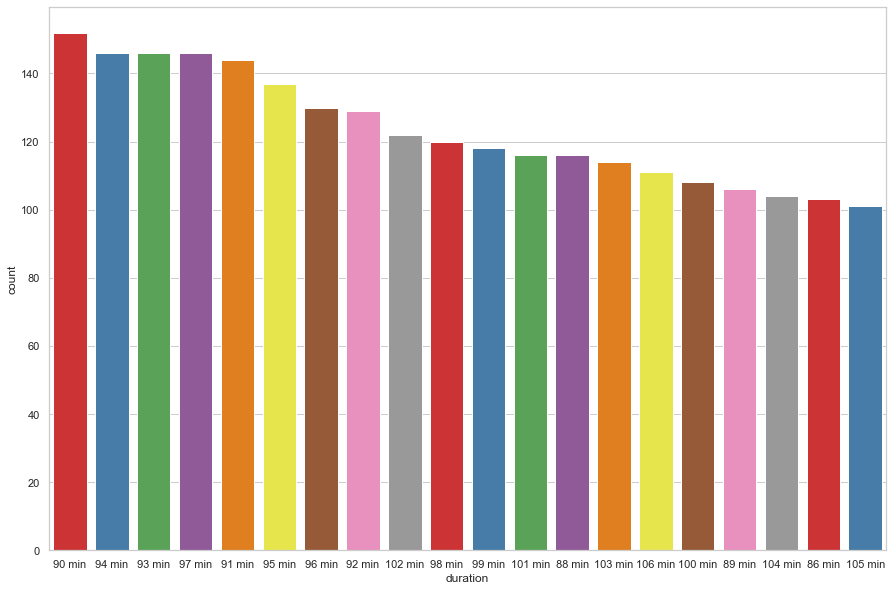

In [45]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
a = sns.countplot(x="duration", data=movie_data, palette="Set1", order=movie_data['duration'].value_counts().index[0:20])

##### Most no of movies duration is around 90 minute

# Most of the Movies produced Countries

##### Here unnesting the country column is important

In [46]:
dc=df.assign(country=df["country"].str.split(",")).explode("country")
dc["country"]=dc["country"].str.lstrip()
dc.replace([""],np.nan,inplace=True)
dc["country"].dropna(inplace=True)



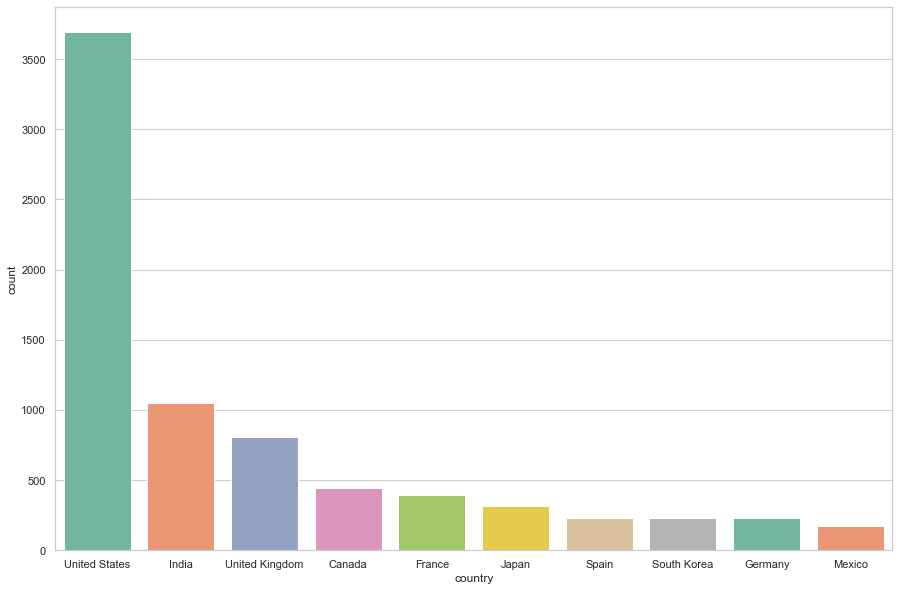

In [47]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
a = sns.countplot(x="country", data=dc, palette="Set2", order=dc['country'].value_counts().index[0:10])

##### Most of the movies produced in United states followed by India, UK, Canada

# Directors in each country

In [48]:
country_director=dc.assign(director=dc["director"].str.split(",")).explode("director")
country_director["director"]=country_director["director"].str.lstrip()
dc.replace([""],np.nan,inplace=True)
country_director["director"].dropna(inplace=True)

In [49]:
country_director1=country_director.groupby("country")["director"].count().to_frame().reset_index()
country_director1
d=country_director1.sort_values("director",ascending=False).reset_index()
d=d.head(20)
d

,index,country,director
0,115,United States,3149
1,45,India,1045
2,114,United Kingdom,591
3,20,Canada,371
4,36,France,364
5,102,Spain,205
6,38,Germany,198
7,53,Japan,170
8,67,Mexico,133
9,23,China,128


## Barplot of Directors in each country

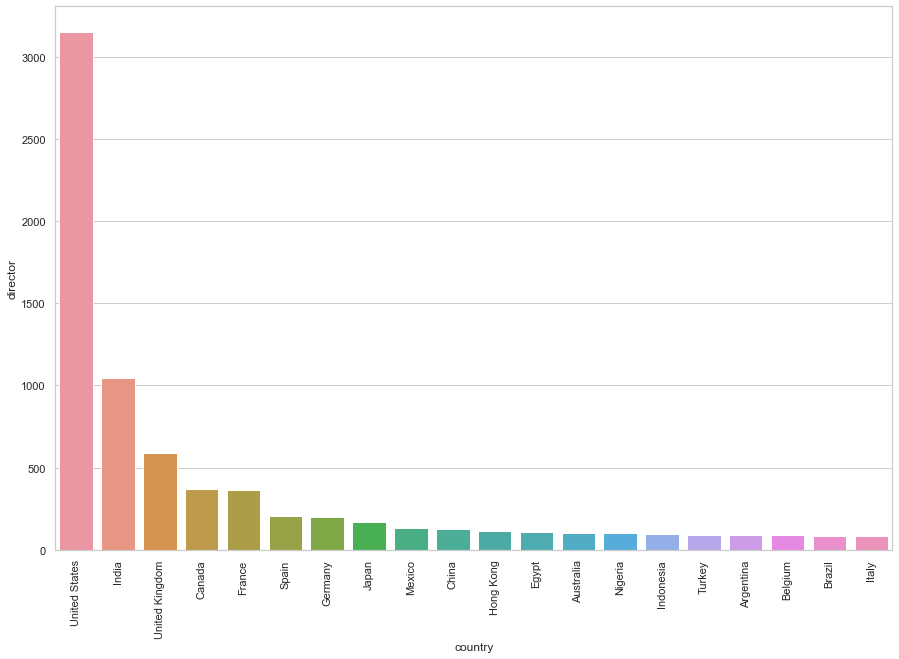

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(data=d,x="country",y="director")
plt.xticks(rotation=90)
plt.show()

##### United States has the most no of Directors 3149 followed by India and United Kingdom


# Most recent directors of Movies in USA


In [51]:
recent_director_movies=drct.assign(country=drct["country"].str.split(",")).explode("country")
recent_director_movies["country"]=recent_director_movies["country"].str.lstrip()
recent_director_movies_us=recent_director_movies.loc[(recent_director_movies.type=="Movie")&(recent_director_movies.country=="United States")]

recent_director_movies_us=recent_director_movies_us.groupby("director")["release_year"].max().to_frame().reset_index()
recent_director_movies_us=recent_director_movies_us.sort_values("release_year",ascending=False)
recent_director_movies_us.head(20)


,director,release_year
1511,Miguel Arteta,2021
1661,Paul Weitz,2021
1854,Ross Kauffman,2021
1394,Martin Desmond Roe,2021
736,Glendyn Ivin,2021
1126,Jude Weng,2021
1844,Roman White,2021
328,Cedric Nicolas-Troyan,2021
2150,Travon Free,2021
2030,Steven Yamamoto,2021


# Most recent directors of movies in India

In [52]:
recent_director_movies=drct.assign(country=drct["country"].str.split(",")).explode("country")
recent_director_movies["country"]=recent_director_movies["country"].str.lstrip()
recent_director_movies_ind=recent_director_movies.loc[(recent_director_movies.type=="Movie")&(recent_director_movies.country=="India")]

recent_director_movies_ind=recent_director_movies_ind.groupby("director")["release_year"].max().to_frame().reset_index()
recent_director_movies_ind=recent_director_movies_ind.sort_values("release_year",ascending=False)
recent_director_movies_ind.head(20)


,director,release_year
356,Nikhil Pherwani,2021
437,Raj Mehta,2021
195,Hardik Mehta,2021
569,Sharan Koppisetty,2021
212,Ivan Ayr,2021
481,Ribhu Dasgupta,2021
479,Renuka Shahane,2021
467,Ramin Bahrani,2021
236,Kaashvie Nair,2021
408,Praveen Kandregula,2021


# Which age category is director mostly prefer

In [53]:
drs=drct.groupby(["rating","type"])["director"].count().to_frame()
drs.columns=["no of director"]
drs=drs.reset_index()
drs=drs.sort_values("no of director",ascending=False)
drs


,rating,type,no of director
15,TV-MA,Movie,2271
11,TV-14,Movie,1516
9,R,Movie,857
17,TV-PG,Movie,578
8,PG-13,Movie,523
7,PG,Movie,338
16,TV-MA,TV Show,185
21,TV-Y7,Movie,157
19,TV-Y,Movie,145
13,TV-G,Movie,132


<AxesSubplot:xlabel='rating', ylabel='no of director'>

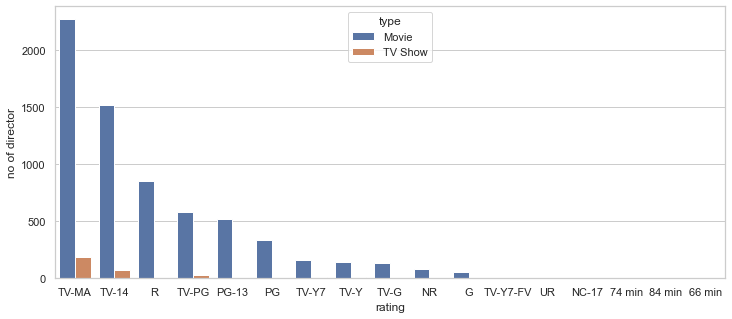

In [54]:
plt.figure(figsize=(12,5))
sns.barplot(data=drs,x="rating",y="no of director",hue="type")

##### TV MA Catogory that is movies for mature audience is directors favourite category

# Shows in different type of age category

In [55]:
show_rating=df.groupby(["rating","type"])["title"].count().to_frame().reset_index()
show_rating=show_rating.sort_values("title",ascending=False)
show_rating

,rating,type,title
15,TV-MA,Movie,2062
11,TV-14,Movie,1427
16,TV-MA,TV Show,1145
9,R,Movie,797
12,TV-14,TV Show,733
17,TV-PG,Movie,540
8,PG-13,Movie,490
18,TV-PG,TV Show,323
7,PG,Movie,287
22,TV-Y7,TV Show,195


# Boxplot of Age Category

<AxesSubplot:xlabel='title', ylabel='rating'>

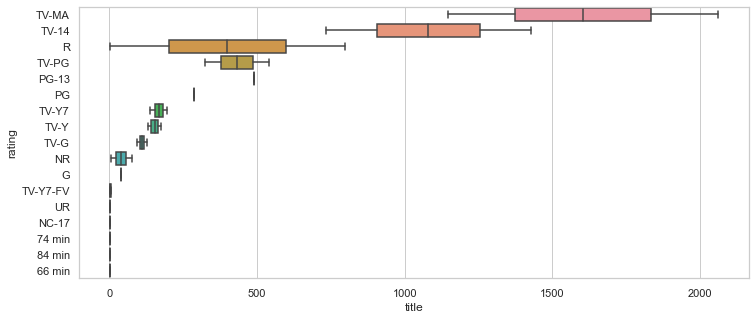

In [56]:
plt.figure(figsize=(12,5))
sns.boxplot(data=show_rating,x="title",y="rating")

<AxesSubplot:xlabel='rating', ylabel='title'>

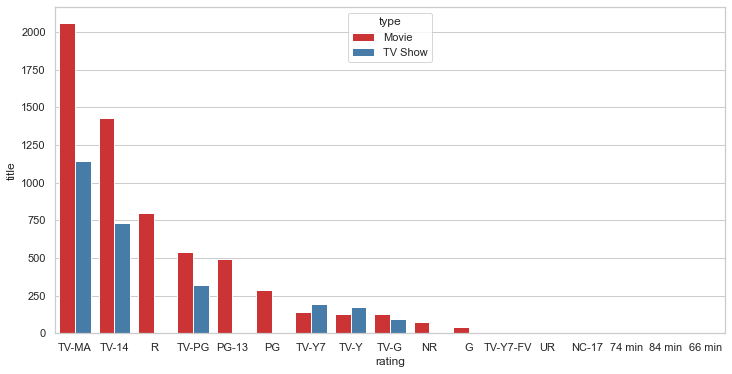

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(data=show_rating,x="rating",y="title",hue="type",palette="Set1")

##### If in Movies TV MA category that is movies for matured audience mostly released
##### If in TV shows TV MA category that is movies for matured audience mostly released

# Actors in different country

In [58]:
#Unnesting the cast column

dcast=df.assign(cast=df["cast"].str.split(",")).explode("cast")
dcast["cast"]=dcast["cast"].str.lstrip()

dcast["cast"].dropna(inplace=True)
dcast.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [59]:
dcast.country.value_counts().to_frame().reset_index()

,index,country
0,United States,19929
1,India,7246
2,Japan,2751
3,United Kingdom,2126
4,South Korea,1478
...,...,...
743,"United Kingdom, Hong Kong",1
744,"Brazil, United States",1
745,"Denmark, China",1
746,"Germany, Italy",1


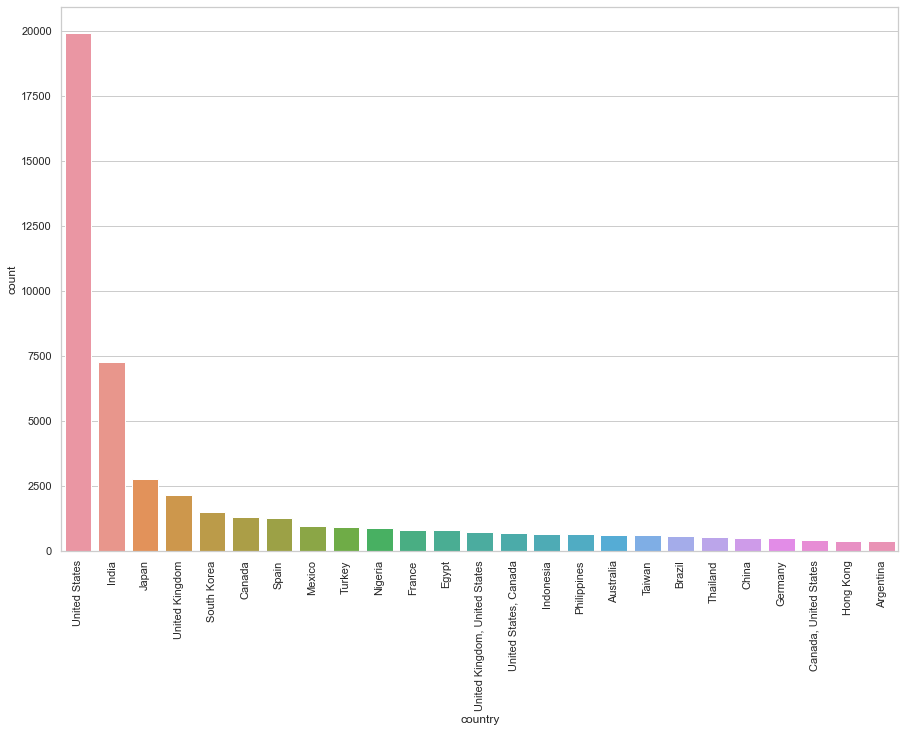

In [60]:
plt.figure(figsize=(15,10))
a=sns.countplot(data=dcast,x="country",order=dcast["country"].value_counts().index[0:25])
a.set_xticklabels(a.get_xticklabels(),rotation=90)
plt.show()

##### United States has the most no of actors present followed by India and Japan


# Content available in different country

In [61]:
dlst_country=dlst.assign(country=dlst["country"].str.split(",")).explode("country")
dlst_country["country"]=dlst_country["country"].str.lstrip()

In [62]:
type_of_shows=dlst_country.groupby("listed_in")["country"].nunique().to_frame().reset_index()
type_of_shows.columns=["show_type","no of countries"]
type_of_shows.sort_values("no of countries",ascending=False)

,show_type,no of countries
16,International Movies,101
12,Dramas,93
10,Documentaries,74
15,Independent Movies,67
7,Comedies,66
17,International TV Shows,62
34,TV Dramas,60
0,Action & Adventure,59
41,Thrillers,55
24,Romantic Movies,53


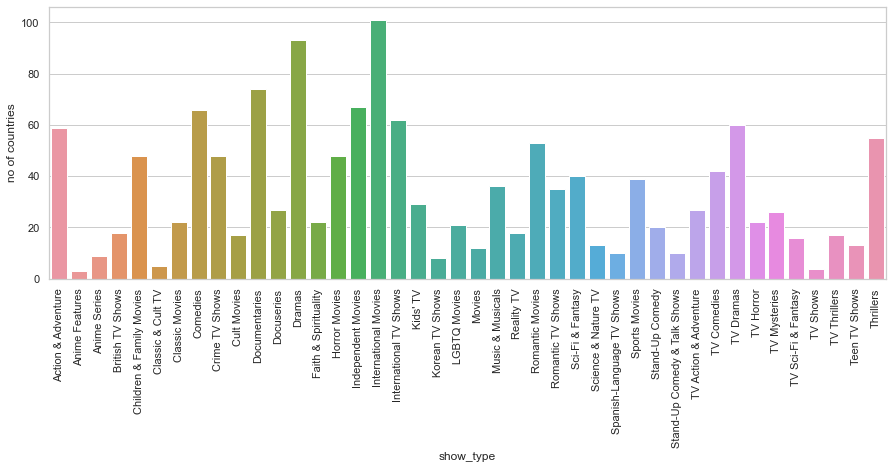

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(data=type_of_shows,x="show_type",y="no of countries")
plt.xticks(rotation=90)
plt.show()

##### International Movies is most popular among all countries
##### 101 countries make international movies followed by drama 93 and documentaries 74
##### Anime feature is least polpular among all countries

# favourite shows in countries

In [64]:
#To find which kind of show is mostly used in countries
fav_show=dlst_country.groupby(["country","listed_in"])["title"].count().to_frame().reset_index()
fav_show=fav_show.sort_values("title",ascending=False)

c=fav_show.groupby(["country","listed_in"])["title"].max().to_frame().reset_index()
c1=c.sort_values("title",ascending=False)
c1


,country,listed_in,title
526,India,International Movies,864
1345,United States,Dramas,835
1340,United States,Comedies,680
522,India,Dramas,662
1343,United States,Documentaries,512
...,...,...,...
766,Mauritius,Children & Family Movies,1
767,Mauritius,Comedies,1
768,Mauritius,International TV Shows,1
769,Mauritius,TV Dramas,1


In [65]:
#we have to find each countries favourite show
#so we have to find maximum title in data c1

c2=c1.groupby(["country"])["title"].max().to_frame().reset_index()
c2.sort_values("title",ascending=False,inplace=True)
c2


,country,title
46,India,864
116,United States,835
115,United Kingdom,225
37,France,207
101,South Korea,152
...,...,...
92,Samoa,1
32,East Germany,1
94,Senegal,1
66,Malta,1


In [66]:
#By using left join 
#join c1 and c2
c2.columns=["country","title2"]
data=c2.merge(c1,left_on="title2",right_on="title")
data1=data.head(10)
data1.drop(["title2","country_y"],axis=1,inplace=True)
data1.columns=["country","favourite shows","numbers"]
data1

C:\Users\raman\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,country,favourite shows,numbers
0,India,International Movies,864
1,United States,Dramas,835
2,United Kingdom,Romantic Movies,225
3,United Kingdom,British TV Shows,225
4,France,International Movies,207
5,South Korea,International TV Shows,152
6,Japan,International TV Shows,151
7,Spain,International Movies,140
8,Egypt,International Movies,99
9,Germany,International Movies,94


##### In India international movies is most produced
##### In USA dramas are most produced
##### In UK Romantic Movies and British tv shows most produced
##### In France International Movies is widely produced

# Actors acted most no of films

In [67]:
most_actors=dcast.groupby("cast")["title"].count().to_frame().reset_index()

most_actors.columns=["cast","no_of_title"]
most_actors=most_actors.sort_values("no_of_title",ascending=False)
most_actors1=most_actors.head(10)
mostact=most_actors1.head(5)
mostact

,cast,no_of_title
2832,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32


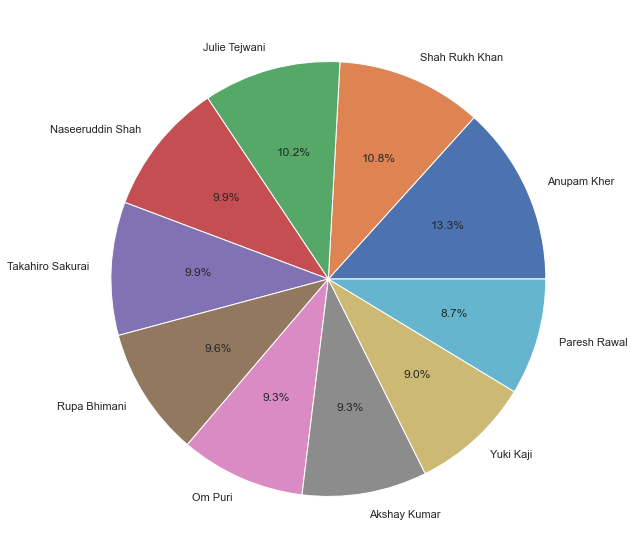

In [68]:
plt.figure(figsize=(12,10))
label=most_actors1.cast
label=label.to_list()
val=most_actors1.no_of_title
val=val.to_list()
plt.pie(val,labels=label,autopct="%1.1f%%")
plt.show()

##### Anupam Kher acted most no of films in Netflix acted 43 films
##### Sharukh khan acted 2nd most no of films 35

# Which month produced most no of films

In [69]:
df['month']=df["date_added"].dt.month_name()
shows_in_month=df.groupby("month")["title"].count().to_frame().reset_index()
x=shows_in_month.sort_values("title",ascending=False)
x

,month,title
5,July,827
2,December,813
11,September,770
0,April,764
10,October,760
1,August,755
7,March,742
4,January,738
6,June,728
9,November,705


<AxesSubplot:xlabel='month', ylabel='title'>

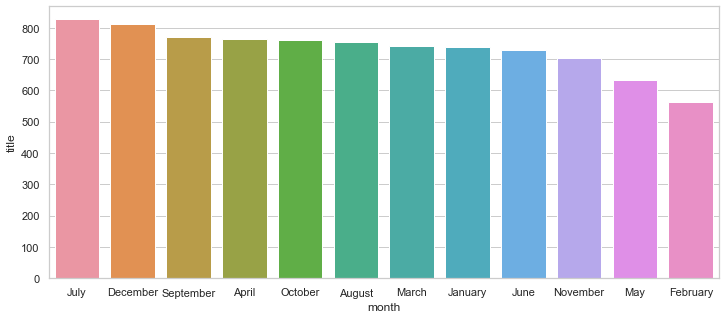

In [70]:
plt.figure(figsize=(12,5))
sns.barplot(data=x,x="month",y="title")

# Which month in India has released more movies 

In [71]:
dc['month']=dc["date_added"].dt.month_name()
shows_in_month=dc.groupby(["month","country"])["title"].count().to_frame().reset_index()
x=shows_in_month.sort_values("title",ascending=False)
x=x.loc[x.country=="India"]
x.sort_values("country",ascending=False)

,month,country,title
136,December,India,120
16,April,India,117
610,October,India,111
434,March,India,110
77,August,India,97
553,November,India,94
315,July,India,81
677,September,India,72
257,January,India,71
495,May,India,65


##### In India December produced most no of movies

# Recommendations 

- Most of the audience prefer movies over TV shows so movie viewers more than TV shows in most of the countries
- US and UK are the countries released most no of TV shows so english language TV shows has more popularity among countries
- In japan and South korea no of TV shows more than no of movies. So these prefer TV shows over movies
- In india no of movies 11 times graeter than no of TV shows, huge no of people in india prefer movies over TV shows
- Rajiv chilaka,Jan sutter,Raul campos are the director directed most no of movies so we can recommend their movies
- Ken Burns,Alastair Fothergill are the director directed most no of TV shows so we can recommend their TV shows
- Very few directors directed both TV shows and Movies
- Most no of movies+TV shows released in last 4 years. So people tend to watch new and recent movies+TV shows over old ,so we can recommend recently released movies and TV shows over old ones
- International movies is the most released genre in most of the countries,So international movies has wide acceptance over the countries, Dramas,comedies and International tv shows are also get wide acceptance .So we can recommend all these genres
- TV shows ended in 1 season is most released so increasing the no of seasons decreasing the no of released so people prefer short season tv shows. 17 seasons is the longest tv show ,only one tv show released with 17 season.But 1793 TV shows contain only one season
- Most no of movies duration lies between 90-100, so most people prefer movies range of 90-100
- Most of the movies made in USA so we can recommend movies based on USA
- Most numbers of directors are from USA,So USA directors get wide acceptance
- Directors mostly prefer TV-MA category movies,and TV-MA category movies is more released ,recommend TV-MA category movies
- Most no of actors are based on USA ,So US actors has more fan base compared to other countries,so we can recommend US actors movies
- In India international movies are more in number and in USA dramas are more in number and in UK Romantic movies and British shows are more in number so we can recommend respective categories in respective countries
- Anupam kher,Shahrukh khan movies are more in number so recommend their movies to their fans
- July and December are the month most number of movies released these are summer vacation and festive month, in india also December,April,October are the month most no of movies released these are also summer vacation and festive month of India.so we can recommend more movies to release in vacation and festive month

In [80]:
pip install -U notebook-as-pdf


Note: you may need to restart the kernel to use updated packages.
